# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ['NEPTUNE_API_TOKEN']="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI5NDc0ZmNhNi0wODFlLTRhYTktYjgwZS01MWJkMDMxNWJhNTAifQ=="
os.environ['NEPTUNE_PROJECT']="guilhermemg/icao-nets-training-2"
os.environ['NEPTUNE_NOTEBOOK_ID']="98a391a1-c710-40bd-aaf4-42c31862cbbe"
os.environ['NEPTUNE_NOTEBOOK_PATH']="training/exec_nas_experiment.ipynb"

In [3]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0, '..')

In [6]:
from src.m_utils import constants as cts
from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName
from src.exp_runner import ExperimentRunner

from src.base.experiment.dataset.dataset import Dataset
from src.base.experiment.evaluation.model_evaluator import DataSource, DataPredSelection
from src.base.experiment.training.base_models import BaseModel
from src.base.experiment.training.optimizers import Optimizer

from src.m_utils.stl_approach import STLApproach
from src.m_utils.mtl_approach import MTLApproach
from src.m_utils.nas_mtl_approach import NAS_MTLApproach

# Start Network runner

In [7]:
DATASET = Dataset.MNIST
APPROACH = NAS_MTLApproach.APPROACH_2

kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'neural_arch_search',
        'description': 'NAS with Approach 2 Fixed',
        'tags': [f'{DATASET.value["name"]}'],
        'src_files': ["../src/**/*.py"]
    },
    'properties': {
        'approach': APPROACH,
        'dataset': DATASET,
        'tasks': DATASET.value['tasks'],
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': True,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'nas_params': {
        'controller_sampling_epochs': 2,
        'samples_per_controller_epochs': 3,
        'controller_training_epochs': 5,
        'architecture_training_epochs': 2,
        'controller_loss_alpha': 0.9,
        'nas_algorithm': 'evolution'
    },
    'controller_params': {
        'controller_lstm_dim': 100,
        'controller_optimizer': Optimizer.ADAM,
        'controller_learning_rate': 0.01,
        'controller_decay': 0.1,
        'controller_momentum': 0.0,
        'controller_use_predictor': True
    },
    'mlp_params': {
        'max_architecture_length': 5,
        'min_task_group_size': 3,
        'mlp_base_model': BaseModel.MOBILENET_V2,
        'mlp_n_epochs': 50,
        'mlp_batch_size': 64,
        'mlp_early_stopping': 50,
        'mlp_optimizer': Optimizer.ADAMAX,
        'mlp_learning_rate': 1e-3,
        'mlp_decay': 0.0,
        'mlp_momentum': 0.0,
        'mlp_dropout': 0.3,
        'mlp_loss_function': 'sparse_categorical_crossentropy',
        'mlp_one_shot': True
    }
}


runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 14147
Process ID: 29919
---------------------------
-----
Use Neptune:  False
-----
-------------------
Args: 
{'controller_params': {'controller_decay': 0.1,
                       'controller_learning_rate': 0.01,
                       'controller_lstm_dim': 100,
                       'controller_momentum': 0.0,
                       'controller_optimizer': <Optimizer.ADAM: 'Adam'>,
                       'controller_use_predictor': True},
 'exp_params': {'description': 'NAS with Approach 2 Fixed',
                'name': 'neural_arch_search',
                'src_files': ['../src/**/*.py'],
                'tags': ['mnist']},
 'mlp_params': {'max_architecture_length': 5,
                'min_task_group_size': 3,
                'mlp_base_model': <BaseModel.MOBILENET_V2: {'name': 'mobilnet_v2', 'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f7

# Load Data

In [8]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
TrainData.shape: (48000, 11)
ValidationData.shape: (12000, 11)
TestData.shape: (10000, 11)
Data loaded


In [9]:
runner.train_data.head()

,img_name,n_0,n_1,n_2,n_3,n_4,n_5,n_6,n_7,n_8,n_9
0,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# <font color='red'>Producing Fake Data</font>

In [10]:
runner.produce_fake_data()

-------------------- producing fake data for experimental purposes -------------------
fake_train_data.shape: (500, 11)
fake_validation_data_df.shape: (100, 11)
fake_test_data_df.shape: (50, 11)


# Data Generators

In [11]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 500 validated image filenames.
Found 100 validated image filenames.
Found 50 validated image filenames.
TOTAL: 650

Logging class indices
 .. MTL model not logging class indices!

Using benchmarking dataset. Not logging class labels!


# Setup Experiment

In [12]:
runner.setup_experiment()

-------------------- create experiment -------------------
Not using Neptune


# Labels Distribution

In [13]:
%%capture
runner.summary_labels_dist()

# Neural Architecture Search - v3

In [19]:
best_archs_list = runner.run_neural_architecture_search_v3()

-------------------- run neural architecture search -------------------
Model path:  trained_model
----
Checking model existence locally...
Training a new model! Not checking model existence
----
------------------------------
Checking GPU availability
 ..GPU is available!
------------------------------
------------------------------------------------------------------
                       CONTROLLER EPOCH: 0
------------------------------------------------------------------
 -- Architecture 0: {'n_denses_0': 3, 'n_denses_1': 3, 'n_denses_2': 4, 'n_denses_3': 3}
Creating model...
Model created
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 3,170,644
  .. Trainable params: 912,660
  .. Non-trainable params: 2,257,984

Epoch 00001: val_loss improved from inf to 0.72683, saving model to training/training_ckpt/best_model.hdf5

Epoch 00002: val_loss improved from 0.72683 to 0.71157, saving model to training/training_ckpt/best_model.hdf5
..Loading best m

# Create Model with Best Architecture Found

In [20]:
#best_arch = {'n_denses_0':2,'n_denses_1':2,'n_denses_2':2,'n_denses_3':2}
best_arch = best_archs_list[0]['Architecture'] if best_archs_list is not None else None

In [22]:
runner.create_model(best_arch)

-------------------- create model -------------------
Creating model...
Model created


# Visualize Model

In [34]:
%%capture
runner.visualize_model(outfile_path=f"training/figs/nas/nas_model_{APPROACH.name}.png")

In [35]:
%%capture
runner.model_summary()

# Training Model

In [36]:
runner.train_model()

-------------------- train model -------------------
Training MOBILENET_V2 network
 .. Not fine tuning base model...
  .. Total params: 4,342,126
  .. Trainable params: 2,084,142
  .. Non-trainable params: 2,257,984
Epoch 1/50
7/7 [==============================] - 48s 6s/step - loss: 1.7008 - background_loss: 0.6989 - close_loss: 0.6962 - ink_mark_loss: 0.7001 - pixelation_loss: 0.7158 - washed_out_loss: 0.6920 - blurred_loss: 0.6965 - sh_head_loss: 0.7040 - mouth_loss: 0.7303 - veil_loss: 0.7175 - red_eyes_loss: 0.7381 - flash_lenses_loss: 0.8117 - dark_glasses_loss: 0.8149 - l_away_loss: 0.7494 - frame_eyes_loss: 0.8489 - hair_eyes_loss: 0.8895 - eyes_closed_loss: 0.7322 - frames_heavy_loss: 0.8890 - sh_face_loss: 0.6933 - skin_tone_loss: 0.6973 - light_loss: 0.6948 - hat_loss: 0.6942 - rotation_loss: 0.7060 - reflection_loss: 0.6974 - background_accuracy: 0.5298 - close_accuracy: 0.4954 - ink_mark_accuracy: 0.4817 - pixelation_accuracy: 0.4633 - washed_out_accuracy: 0.5367 - blurre

/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


Epoch 2/50
7/7 [==============================] - 34s 5s/step - loss: 1.5821 - background_loss: 0.6865 - close_loss: 0.6902 - ink_mark_loss: 0.6929 - pixelation_loss: 0.6910 - washed_out_loss: 0.6876 - blurred_loss: 0.6942 - sh_head_loss: 0.6895 - mouth_loss: 0.6841 - veil_loss: 0.6751 - red_eyes_loss: 0.6636 - flash_lenses_loss: 0.6899 - dark_glasses_loss: 0.6939 - l_away_loss: 0.6794 - frame_eyes_loss: 0.7037 - hair_eyes_loss: 0.7048 - eyes_closed_loss: 0.6681 - frames_heavy_loss: 0.6872 - sh_face_loss: 0.6887 - skin_tone_loss: 0.6902 - light_loss: 0.6925 - hat_loss: 0.6873 - rotation_loss: 0.6895 - reflection_loss: 0.6910 - background_accuracy: 0.5688 - close_accuracy: 0.5183 - ink_mark_accuracy: 0.5252 - pixelation_accuracy: 0.5390 - washed_out_accuracy: 0.5482 - blurred_accuracy: 0.5206 - sh_head_accuracy: 0.5459 - mouth_accuracy: 0.5596 - veil_accuracy: 0.5596 - red_eyes_accuracy: 0.5917 - flash_lenses_accuracy: 0.5505 - dark_glasses_accuracy: 0.5367 - l_away_accuracy: 0.5642 - f

# Plots

-------------------- draw training history -------------------


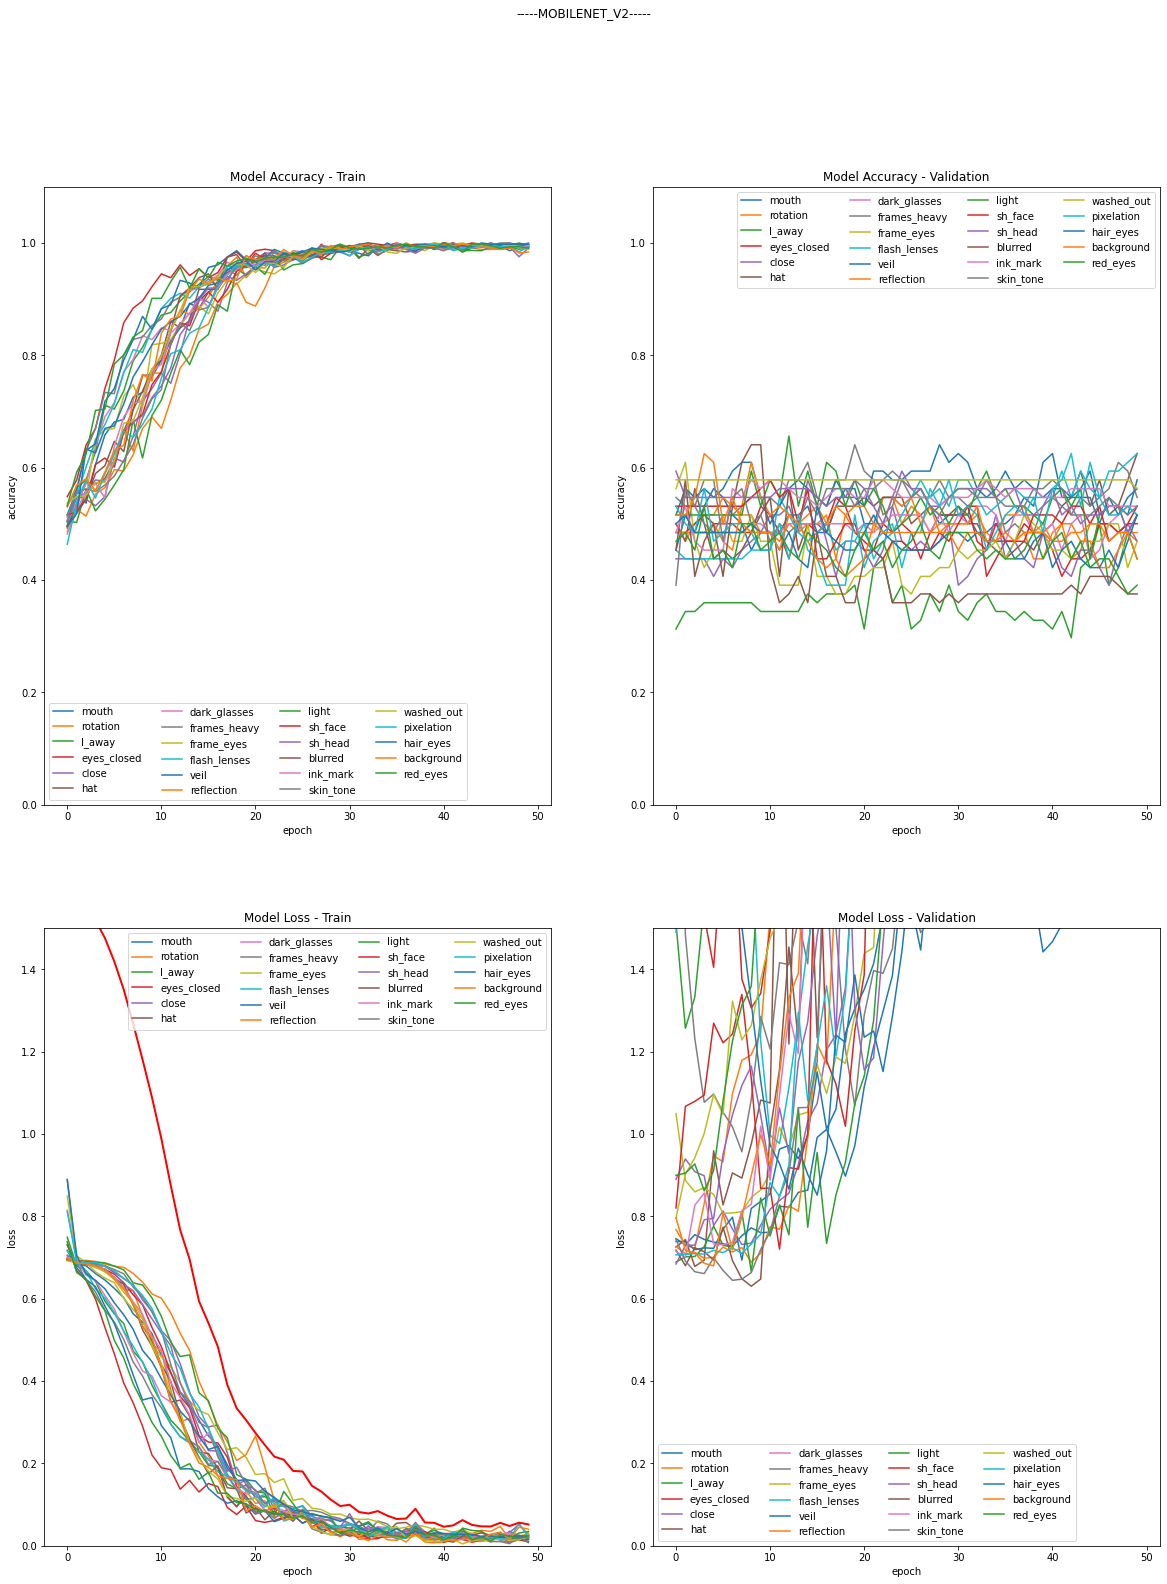

In [37]:
runner.draw_training_history()

# Load Best Model

In [38]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [39]:
runner.save_model()

-------------------- save model -------------------
Saving model


/home/guilherme/data2/anaconda3/envs/icao_nets_training/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: trained_model/assets
..Model saved
...Model path: trained_model
Saving process finished


# Test Trained Model

## Validation Split

In [40]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
2/2 [==============================] - 8s 3s/step
Prediction finished!
  Task  0: mouth           | EER_mean: 0.48890 | EER_interp: 0.49900 | ACC: 0.50000
  Task  1: rotation        | EER_mean: 0.53660 | EER_interp: 0.53100 | ACC: 0.47000
  Task  2: l_away          | EER_mean: 0.50880 | EER_interp: 0.51020 | ACC: 0.49000
  Task  3: eyes_closed     | EER_mean: 0.54000 | EER_interp: 0.54000 | ACC: 0.46000
  Task  4: close           | EER_mean: 0.51020 | EER_interp: 0.51980 | ACC: 0.48000
  Task  5: hat             | EER_mean: 0.47620 | EER_interp: 0.47080 | ACC: 0.53000
  Task  6: dark_glasses    | EER_mean: 0.40000 | EER_interp: 0.38890 | ACC: 0.61000
  Task  7: frames_heavy    | EER_mean: 0.51060 | EER_interp: 0.51000 | ACC: 0.49000
  Task  8: frame_eyes      | EER_mean: 0.45650 | EER_interp: 0.45040 | ACC: 0.55000
  Task  9: flash_lenses    | EER_mean: 0.48080 | EER_interp: 0.45920 | ACC: 0.54000
  Task 10: veil            | EER_mean: 0.5091

## Test Split

In [41]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
1/1 [==============================] - 0s 348ms/step
Prediction finished!
  Task  0: mouth           | EER_mean: 0.50000 | EER_interp: 0.50000 | ACC: 0.50000
  Task  1: rotation        | EER_mean: 0.50000 | EER_interp: 0.50000 | ACC: 0.50000
  Task  2: l_away          | EER_mean: 0.56250 | EER_interp: 0.55910 | ACC: 0.44000
  Task  3: eyes_closed     | EER_mean: 0.61540 | EER_interp: 0.62020 | ACC: 0.38000
  Task  4: close           | EER_mean: 0.42860 | EER_interp: 0.41880 | ACC: 0.58000
  Task  5: hat             | EER_mean: 0.38710 | EER_interp: 0.37780 | ACC: 0.62000
  Task  6: dark_glasses    | EER_mean: 0.48150 | EER_interp: 0.52340 | ACC: 0.48000
  Task  7: frames_heavy    | EER_mean: 0.58060 | EER_interp: 0.55340 | ACC: 0.44000
  Task  8: frame_eyes      | EER_mean: 0.44440 | EER_interp: 0.46140 | ACC: 0.54000
  Task  9: flash_lenses    | EER_mean: 0.50000 | EER_interp: 0.51780 | ACC: 0.48000
  Task 10: veil            | EER_mean: 0.5

# Visualize Model Classification

# Finishing Experiment Manager

In [42]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Not using Neptune
